# Correlation Between BMI and GDP of Countries

In [1]:
import pandas as pd
import numpy

In [2]:
# Load States BMI Data
url = '/Users/redarerizani/Desktop/ironhack/Final project /Sleep-Health-and-Lifestyle/csv file /States_BMI_Data.csv'
bmi = pd.read_csv(url)
bmi

,Country,BMI
0,Afghanistan,21.6
1,Albania,26.1
2,Algeria,26.2
3,Andorra,27.5
4,Angola,24.1
...,...,...
191,Venezuela,27.2
192,Vietnam,21.6
193,Yemen,25.8
194,Zambia,22.6


In [3]:
# Load GDP DATA 
url2 = '/Users/redarerizani/Desktop/ironhack/Final project /Sleep-Health-and-Lifestyle/csv file /gdp_data.csv'
gdp = pd.read_csv(url2)
gdp

,Country,GDP_MEAN
0,Afghanistan,1.776877e+10
1,Africa Eastern and Southern,1.043852e+12
2,Africa Western and Central,8.197695e+11
3,Albania,1.651359e+10
4,Algeria,1.701771e+11
...,...,...
254,West Bank and Gaza,1.723254e+10
255,World,9.152510e+13
256,"Yemen, Rep.",2.160616e+10
257,Zambia,2.379820e+10


Merge  les deux tableaux 

In [4]:
# Clean and standardize country names in the BMI DataFrame
bmi['Country'] = bmi['Country'].str.strip()  # Remove leading and trailing spaces
bmi['Country'] = bmi['Country'].str.replace('.', '')  # Remove periods
bmi['Country'] = bmi['Country'].str.replace(',', '')  # Remove commas
bmi['Country'] = bmi['Country'].str.replace('-', ' ')  # Replace dashes with spaces
bmi['Country'] = bmi['Country'].str.upper()  # Convert to uppercase

# Clean and standardize country names in the GDP DataFrame
gdp['Country'] = gdp['Country'].str.strip()  # Remove leading and trailing spaces
gdp['Country'] = gdp['Country'].str.replace('.', '')  # Remove periods
gdp['Country'] = gdp['Country'].str.replace(',', '')  # Remove commas
gdp['Country'] = gdp['Country'].str.replace('-', ' ')  # Replace dashes with spaces
gdp['Country'] = gdp['Country'].str.upper()  # Convert to uppercase

# Perform the join using standardized country names
df_bmi_gdp = bmi.merge(gdp, on='Country', how='left')

df_bmi_gdp


,Country,BMI,GDP_MEAN
0,AFGHANISTAN,21.6,1.776877e+10
1,ALBANIA,26.1,1.651359e+10
2,ALGERIA,26.2,1.701771e+11
3,ANDORRA,27.5,3.188349e+09
4,ANGOLA,24.1,7.442762e+10
...,...,...,...
191,VENEZUELA,27.2,NaN
192,VIETNAM,21.6,NaN
193,YEMEN,25.8,NaN
194,ZAMBIA,22.6,2.379820e+10


In [5]:


# Define the function to convert scientific notation to "milliard"
def convert_to_billion(value):
    return value / 1e9  # Convertir de e10 à milliards

# Apply the function to the 'Values' column of the DataFrame
df_bmi_gdp['GDP_MEAN'] = df_bmi_gdp['GDP_MEAN'].apply(convert_to_billion)
df_bmi_gdp['GDP_MEAN'] = df_bmi_gdp['GDP_MEAN'].round(2)
df_bmi_gdp.dropna() 

#


,Country,BMI,GDP_MEAN
0,AFGHANISTAN,21.6,17.77
1,ALBANIA,26.1,16.51
2,ALGERIA,26.2,170.18
3,ANDORRA,27.5,3.19
4,ANGOLA,24.1,74.43
...,...,...,...
187,URUGUAY,26.8,62.70
188,UZBEKISTAN,26.1,64.67
189,VANUATU,26.2,0.96
194,ZAMBIA,22.6,23.80


In [6]:
# Save the DataFrame to a CSV file named "Body_Mass_Index_Data.csv"
df_bmi_gdp.to_csv('Body_Mass_gdp.csv', index=False)

In [7]:

top_10_rich_countries = df_bmi_gdp.nlargest(5, 'GDP_MEAN')
top_10_rich_countries

,Country,BMI,GDP_MEAN
186,UNITED STATES,28.8,22345.86
35,CHINA,23.9,15729.25
84,JAPAN,22.6,4901.10
63,GERMANY,26.3,4022.46
75,INDIA,21.9,2955.42


In [8]:
top_10_poor_countries = df_bmi_gdp.nsmallest(5, 'GDP_MEAN')
top_10_poor_countries

,Country,BMI,GDP_MEAN
181,TUVALU,29.3,0.05
120,NAURU,32.5,0.14
88,KIRIBATI,29.6,0.20
107,MARSHALL ISLANDS,29.2,0.24
132,PALAU,29.4,0.27


In [9]:
comparaison = pd.concat([top_10_rich_countries, top_10_poor_countries]).reset_index()
comparaison

,index,Country,BMI,GDP_MEAN
0,186,UNITED STATES,28.8,22345.86
1,35,CHINA,23.9,15729.25
2,84,JAPAN,22.6,4901.10
3,63,GERMANY,26.3,4022.46
4,75,INDIA,21.9,2955.42
5,181,TUVALU,29.3,0.05
6,120,NAURU,32.5,0.14
7,88,KIRIBATI,29.6,0.20
8,107,MARSHALL ISLANDS,29.2,0.24
9,132,PALAU,29.4,0.27


In [10]:
# Save the DataFrame to a CSV file named "Body_Mass_Index_Data.csv"
comparaison.to_csv('Body_Mass_gdp.csv', index=False)

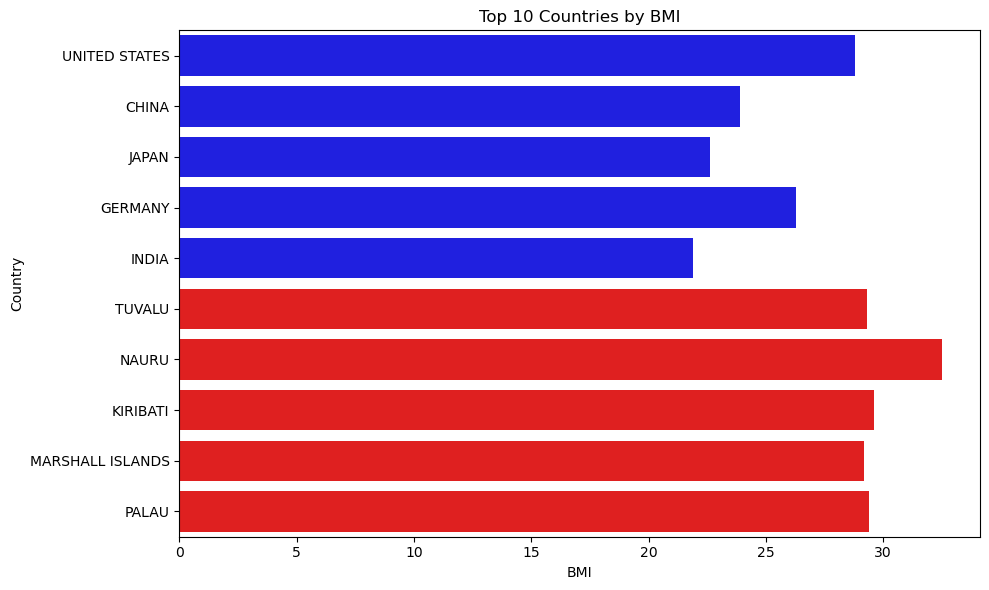

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Définition des couleurs pour chaque pays
colors = {}
for country in comparaison['Country']:
    if country in ['UNITED STATES', 'CHINA', 'JAPAN', 'GERMANY', 'INDIA']:
        colors[country] = 'blue'
    else:
        colors[country] = 'red'

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=comparaison.reset_index(), x='BMI', y='Country', palette=colors)
plt.xlabel('BMI')
plt.ylabel('Country')
plt.title('Top 10 Countries by BMI')
plt.tight_layout()
plt.show()



